<a href="https://colab.research.google.com/github/Santha-Lakshmi-S/AMCAT-Data-Analysis/blob/main/EDA_Project_1_Analysis_of_AMCAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Project 1 - Analysis of AMCAT Data

In [2]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

Data Import and Overview

In [3]:
print(df.head())

  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...  

In [4]:
print(df.shape)

(3998, 39)


In [5]:
print(df.describe())

                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

Univariate Analysis

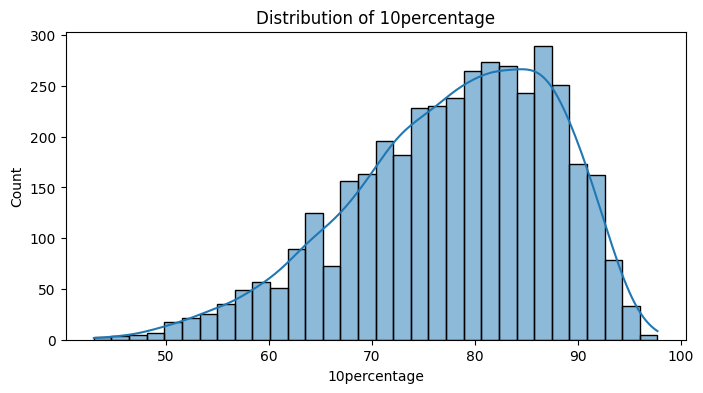

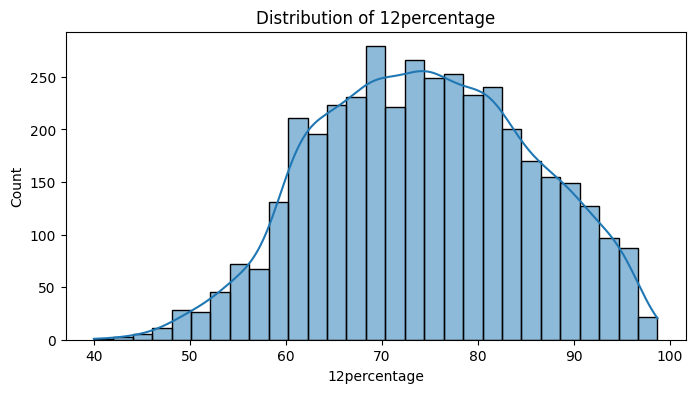

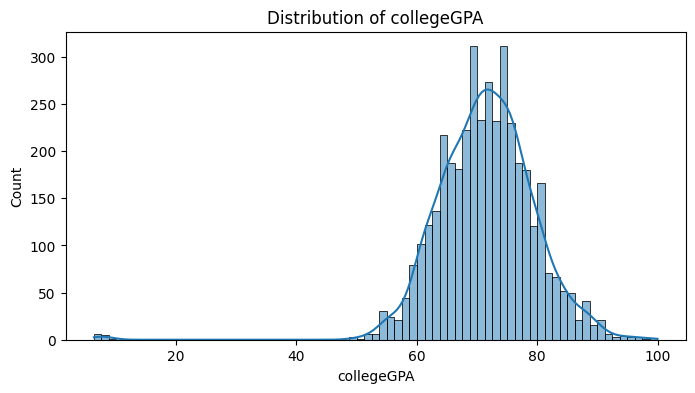

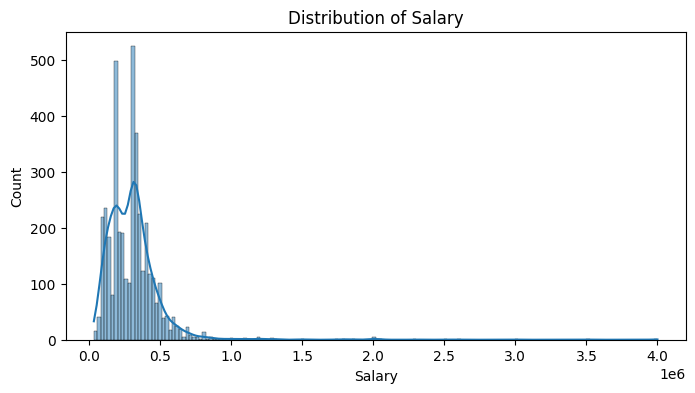

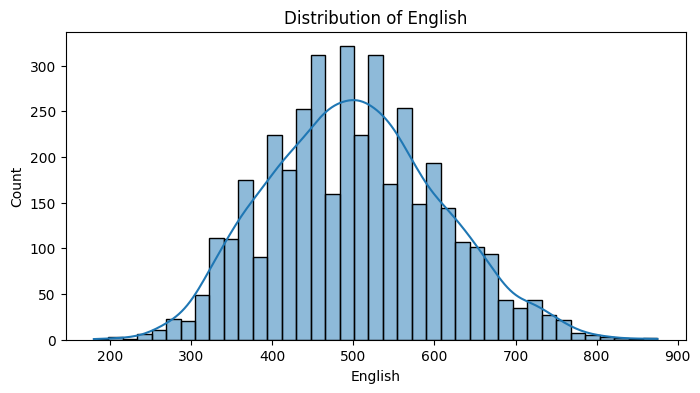

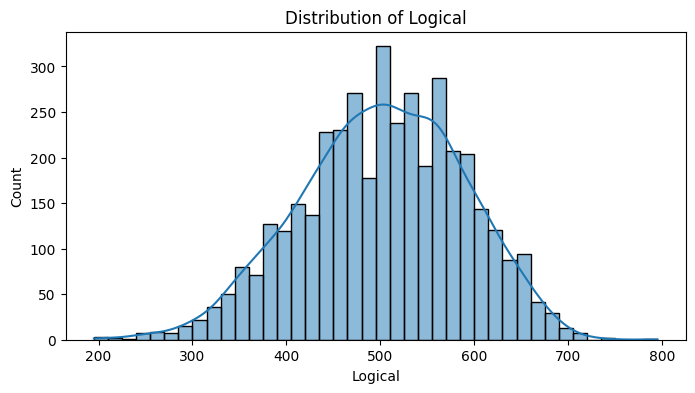

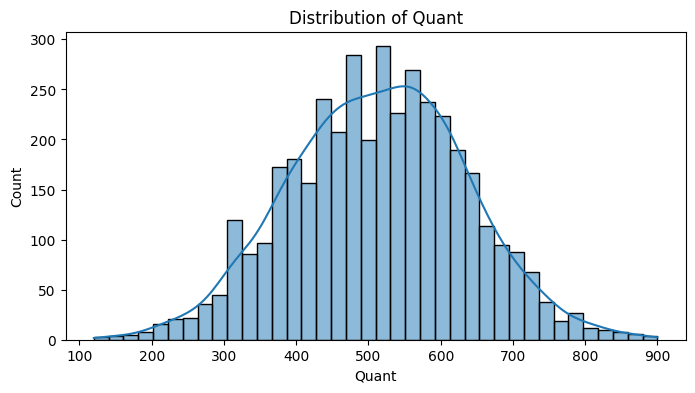

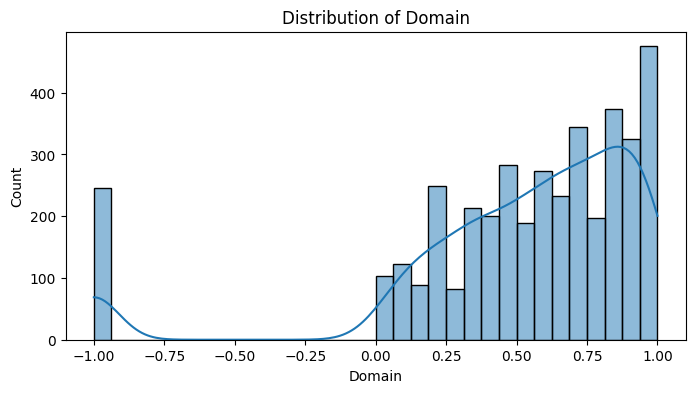

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['10percentage', '12percentage', 'collegeGPA', 'Salary', 'English', 'Logical', 'Quant', 'Domain']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

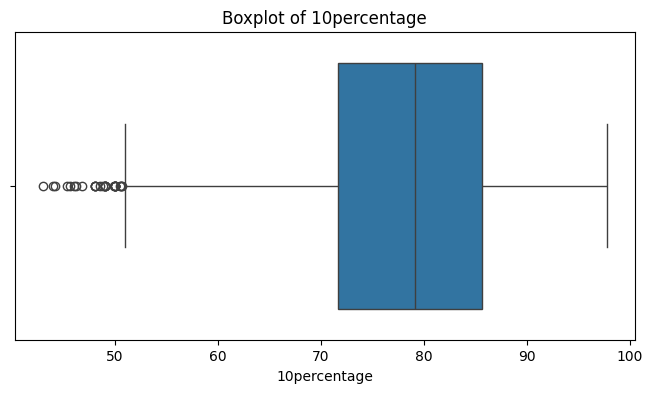

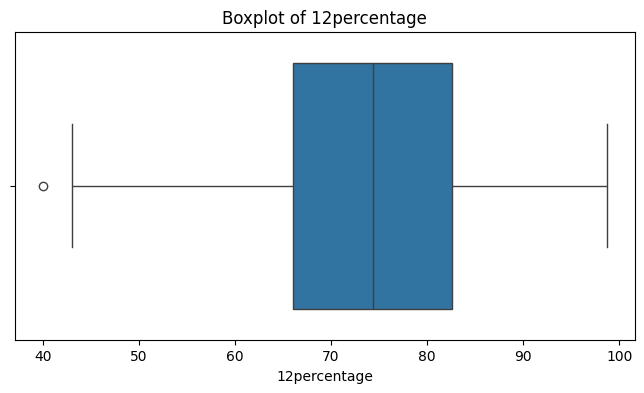

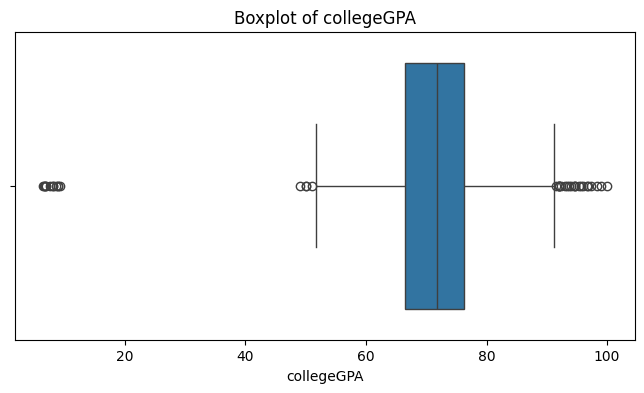

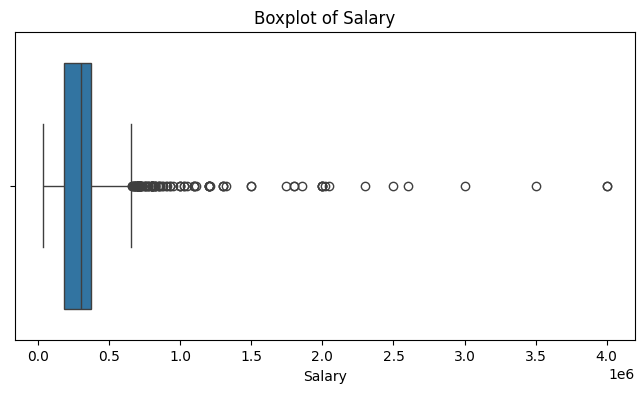

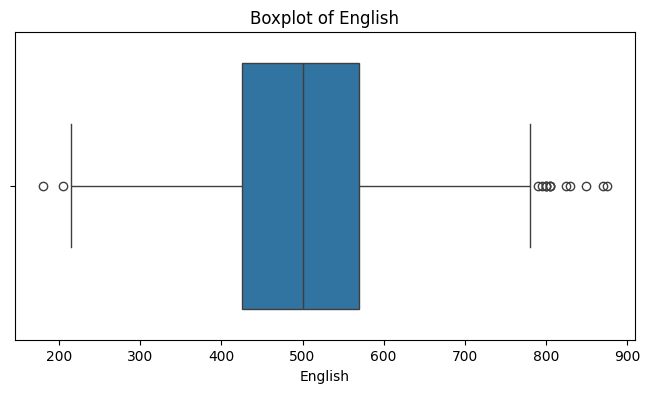

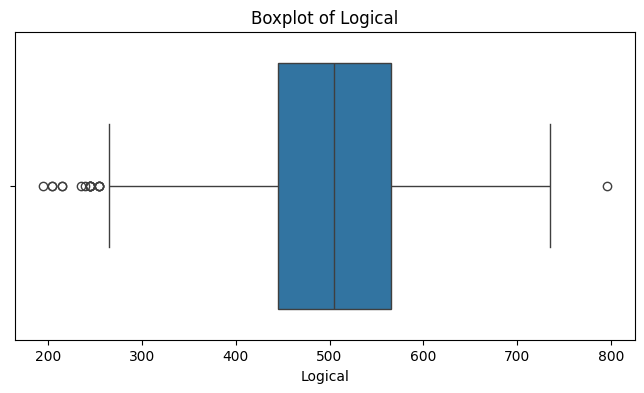

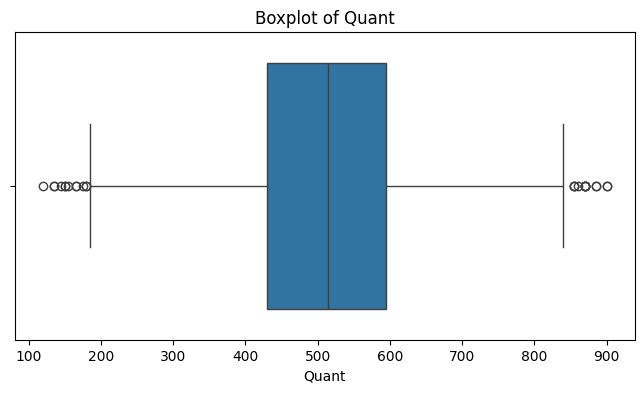

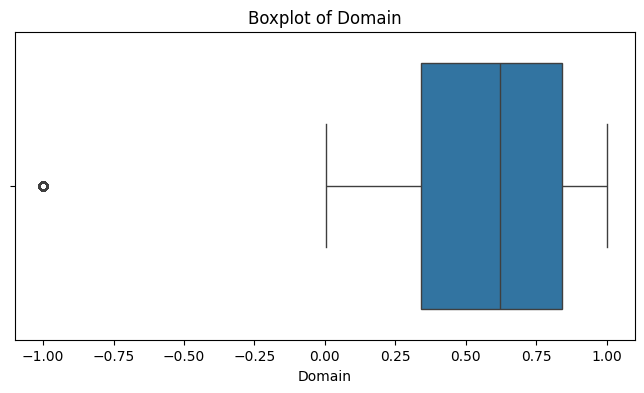

In [8]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

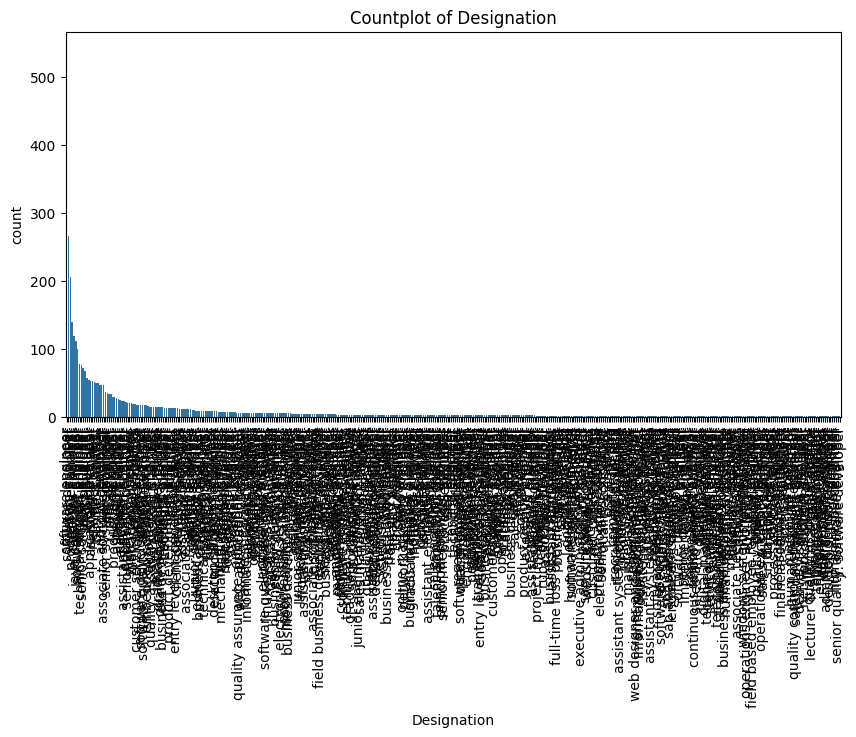

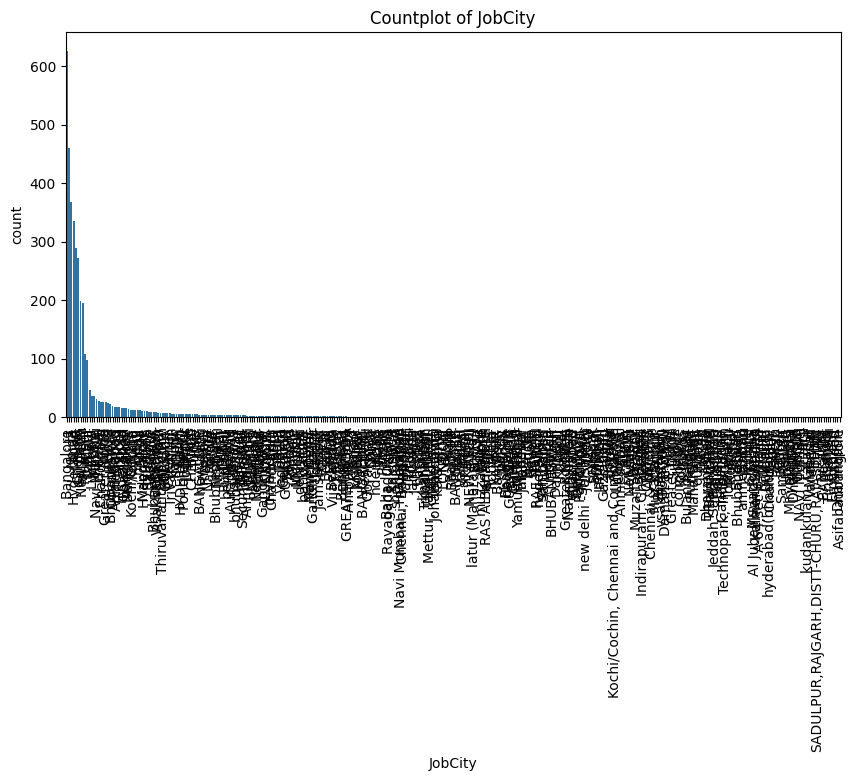

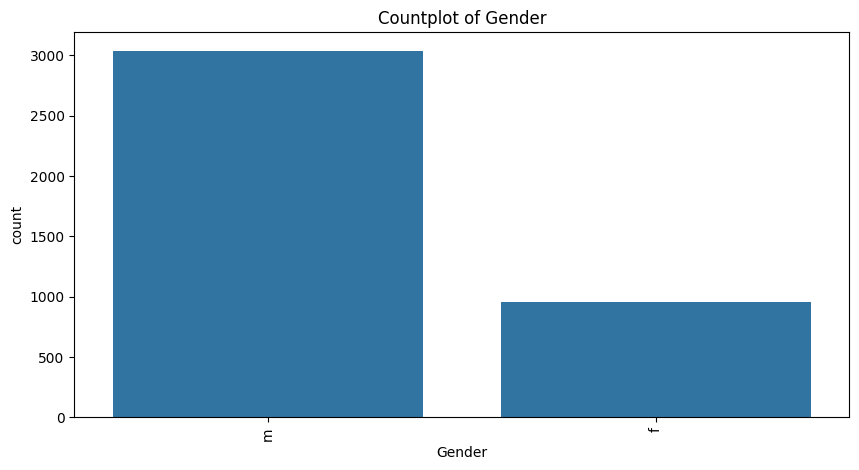

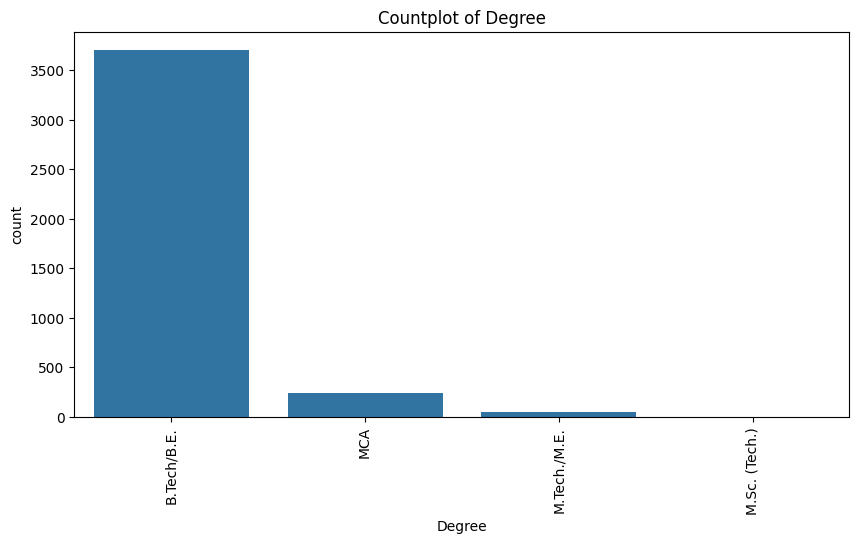

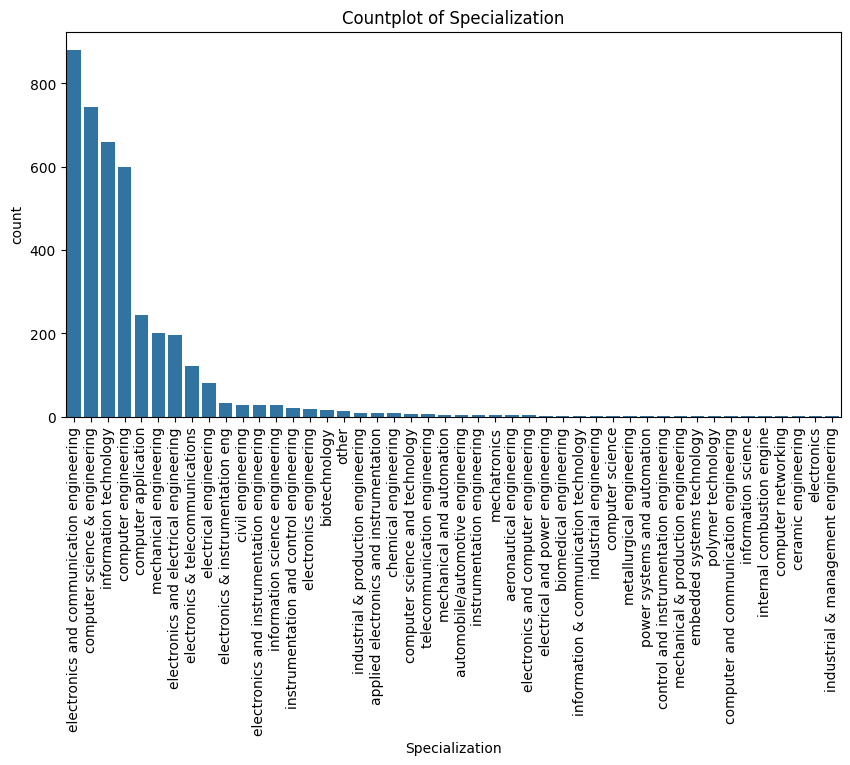

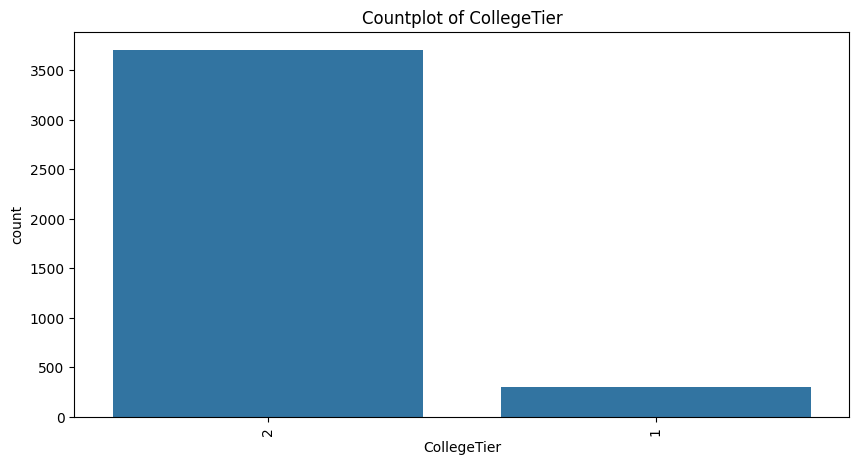

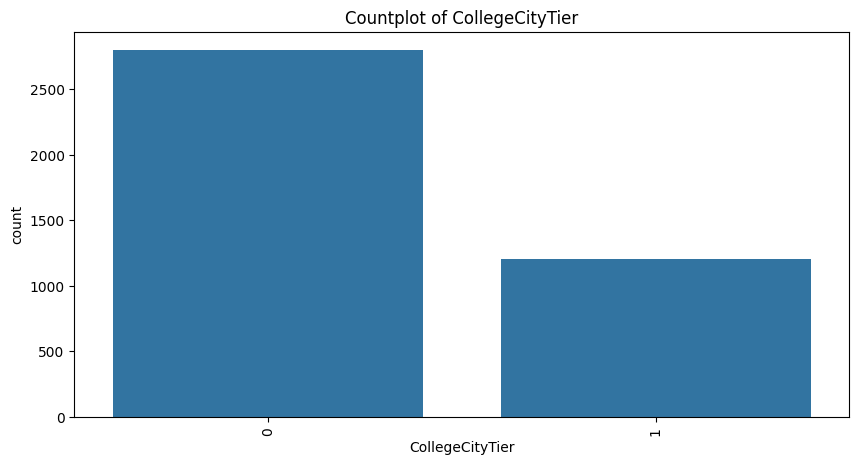

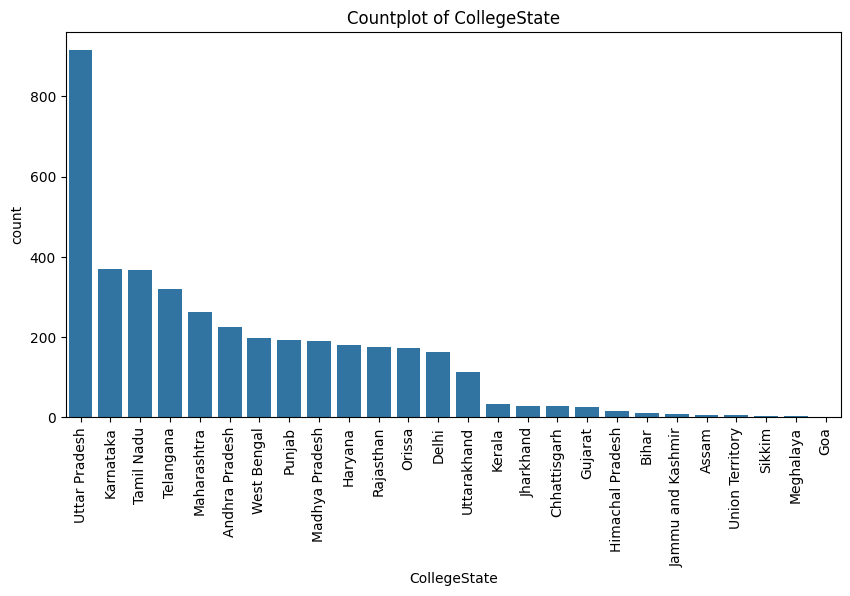

In [9]:
categorical_columns = ['Designation', 'JobCity', 'Gender', 'Degree', 'Specialization', 'CollegeTier', 'CollegeCityTier', 'CollegeState']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.show()

Bivariate Analysis

In [13]:
for col in numerical_columns + ['Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df_cleaned = df[numerical_columns + ['Salary']].dropna()

In [16]:
# Display data types and the first few rows to identify any problematic columns
print(df[numerical_columns + ['Salary']].dtypes)
print(df[numerical_columns + ['Salary']].head())

10percentage    float64
12percentage    float64
collegeGPA      float64
Salary          float64
English           int64
Logical           int64
Quant             int64
Domain          float64
Salary          float64
dtype: object
   10percentage  12percentage  collegeGPA     Salary  English  Logical  Quant  \
0          84.3          95.8       78.00   420000.0      515      585    525   
1          85.4          85.0       70.06   500000.0      695      610    780   
2          85.0          68.2       70.00   325000.0      615      545    370   
3          85.6          83.6       74.64  1100000.0      635      585    625   
4          78.0          76.8       73.90   200000.0      545      625    465   

     Domain     Salary  
0  0.635979   420000.0  
1  0.960603   500000.0  
2  0.450877   325000.0  
3  0.974396  1100000.0  
4  0.124502   200000.0  


In [17]:
# Convert all values to numeric, coercing errors to NaN
for col in numerical_columns + ['Salary']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values after converting
df_cleaned = df[numerical_columns + ['Salary']].dropna()

In [18]:
print(df_cleaned.shape)  # Should be (n, m) where n is the number of samples and m is the number of columns

(3998, 9)


In [22]:
# Create the subset of numerical columns including 'Salary'
df_subset = df[numerical_columns + ['Salary']]

In [23]:
# Remove duplicate columns in the subset
df_subset = df_subset.loc[:, ~df_subset.columns.duplicated()]

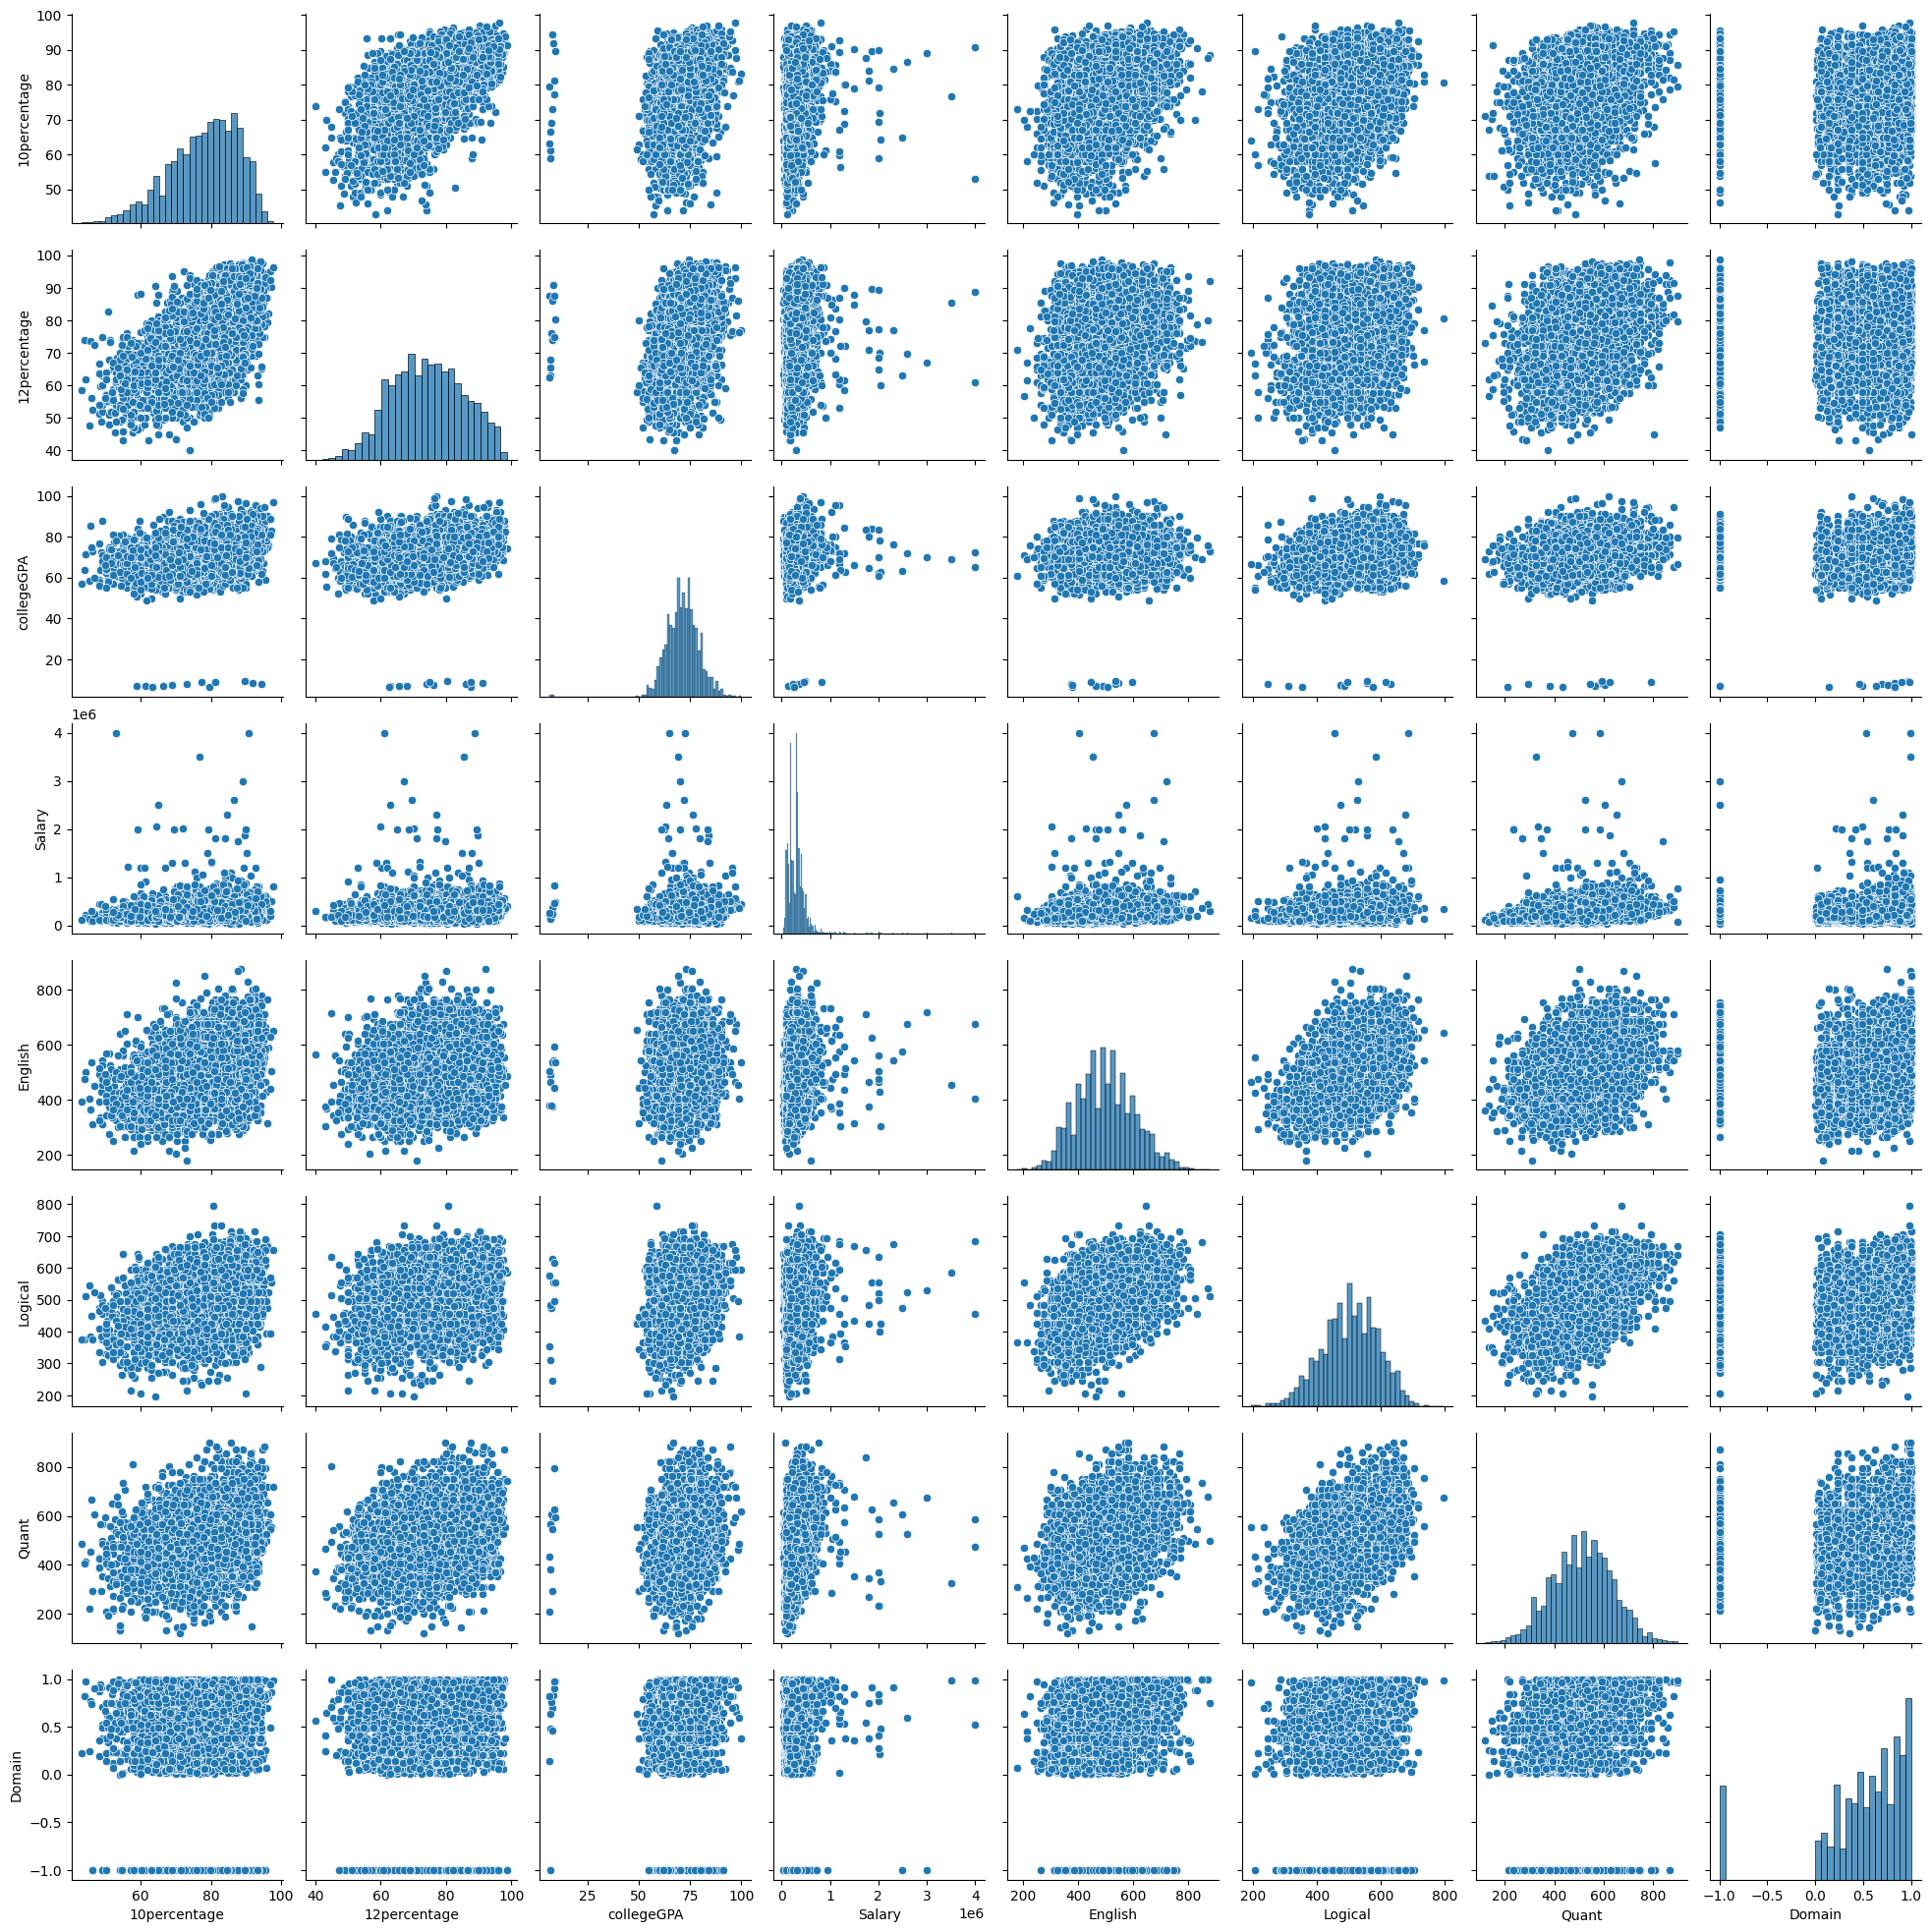

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pairplot with the cleaned data
sns.pairplot(df_subset)
plt.show()

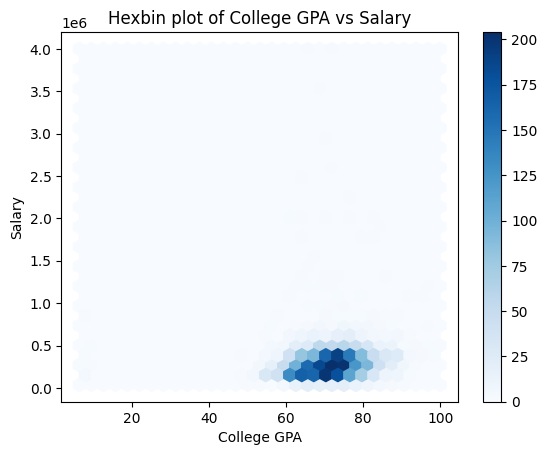

In [25]:
plt.hexbin(df['collegeGPA'], df['Salary'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.title('Hexbin plot of College GPA vs Salary')
plt.show()

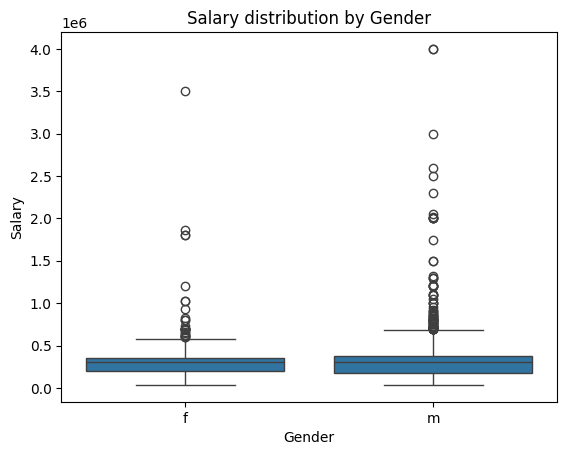

In [26]:
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary distribution by Gender')
plt.show()

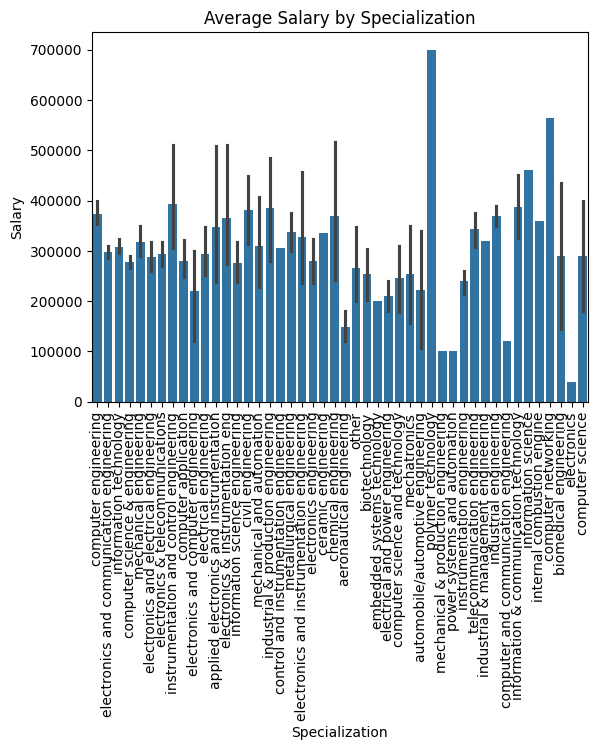

In [27]:
sns.barplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Average Salary by Specialization')
plt.show()

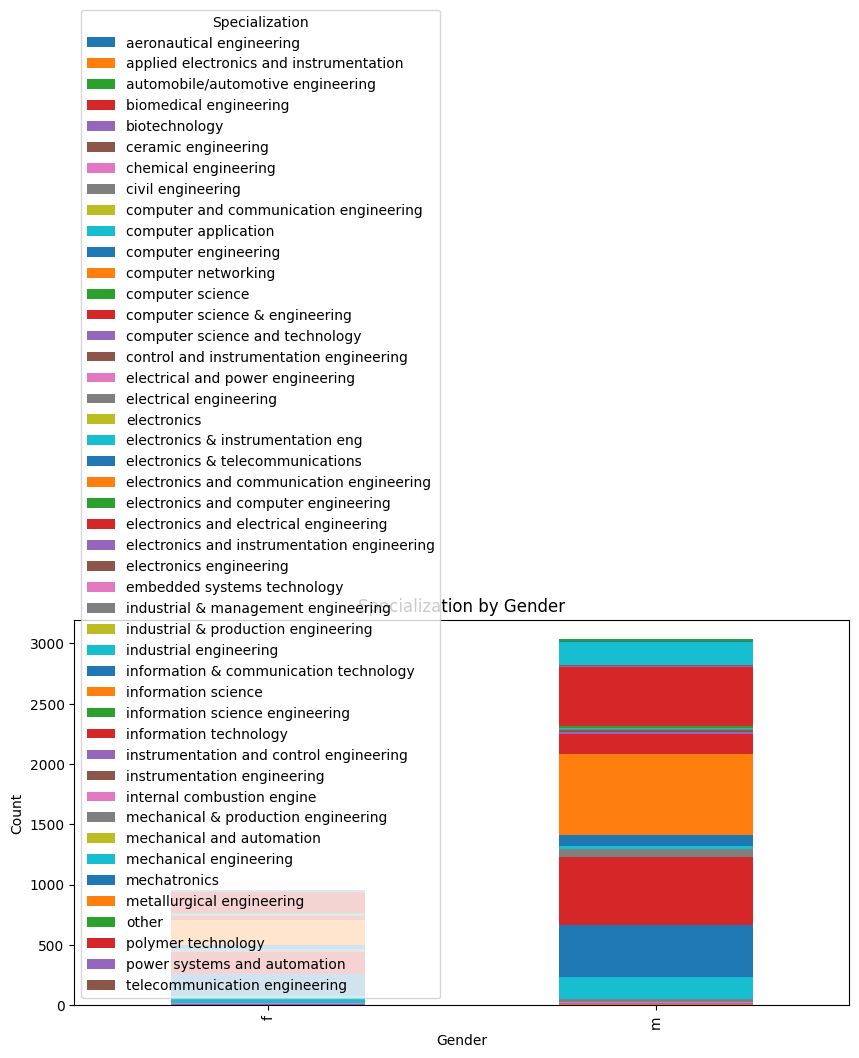

In [29]:
crosstab = pd.crosstab(df['Gender'], df['Specialization'])
crosstab.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Specialization by Gender')
plt.ylabel('Count')
plt.show()

Research Questions

In [30]:
cs_jobs = df[(df['Specialization'].str.contains('computer science', case=False)) &
             (df['Designation'].str.contains('analyst|engineer', case=False))]
avg_salary = cs_jobs['Salary'].mean()
print(f"Average Salary for relevant job roles: {avg_salary}")

Average Salary for relevant job roles: 302995.3917050691


In [31]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value: {p}")

Chi-square Test p-value: 1.2453868176976918e-06
